In [17]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

In [18]:
df = pd.read_csv('platform_dataset.csv')

df


,Type of Product,Date of Purchase,Cost of Purchase,Qty of Purchase,Customer ID,Seller Brand,Seller ID,Rating,Time Taken for Transaction (s),Month of Transaction,Time of Transaction,return
0,Baby and Toys,06/03/2021,664.03,6,46440,Fisher-Price,135,4,87.12,3,19:30,1
1,Baby and Toys,09/12/2020,611.62,7,20726,Fisher-Price,209,1,3.00,12,20:15,0
2,Fashion,07/06/2020,194.32,5,38188,Supre,701,2,97.24,6,23:00,0
3,Fashion,20/08/2020,753.32,4,25439,Boohoo,840,2,67.30,8,20:15,0
4,Fashion,30/11/2021,576.08,6,13253,Zalando,397,3,11.55,11,12:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Electronics,11/02/2021,844.50,6,64738,Samsung,331,3,34.22,2,22:15,0
9996,Fashion,20/01/2022,811.50,2,71975,C&A,952,1,97.86,1,21:00,0
9997,Beauty and Personal Care,04/11/2020,452.69,6,67572,Colgate,813,1,3.55,11,19:15,0
9998,Groceries,12/08/2020,235.06,10,81854,Unilever,871,2,85.97,8,21:30,0


In [19]:
df[df['Seller Brand'] == "Fashion Nova"]

,Type of Product,Date of Purchase,Cost of Purchase,Qty of Purchase,Customer ID,Seller Brand,Seller ID,Rating,Time Taken for Transaction (s),Month of Transaction,Time of Transaction,return
14,Fashion,29/11/2021,413.80,10,39309,Fashion Nova,998,4,32.03,11,01:45,1
133,Fashion,22/02/2022,221.94,9,58129,Fashion Nova,900,2,37.40,2,21:15,0
159,Fashion,27/04/2020,928.20,4,45642,Fashion Nova,579,4,38.07,4,20:00,1
185,Fashion,17/09/2020,458.72,9,35014,Fashion Nova,579,4,68.23,9,19:45,1
191,Fashion,02/06/2021,474.91,4,53107,Fashion Nova,325,3,87.68,6,23:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9534,Fashion,16/05/2021,656.36,3,11067,Fashion Nova,628,1,104.87,5,20:45,0
9554,Fashion,24/09/2020,776.53,6,48103,Fashion Nova,555,1,8.18,9,04:30,0
9647,Fashion,26/04/2021,309.71,1,22166,Fashion Nova,736,2,53.48,4,21:30,0
9808,Fashion,10/02/2021,538.61,6,53380,Fashion Nova,275,5,74.26,2,05:00,1


In [20]:
df.describe()

,Cost of Purchase,Qty of Purchase,Customer ID,Seller ID,Rating,Time Taken for Transaction (s),Month of Transaction,return
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.662359,5.527700,54638.404600,543.747400,3.014100,59.472283,6.111400,0.402500
std,289.967500,2.864132,25933.078744,258.865612,1.411985,34.682244,3.573915,0.490426
min,0.350000,1.000000,10008.000000,100.000000,1.000000,0.010000,1.000000,0.000000
25%,246.777500,3.000000,32014.750000,318.000000,2.000000,28.840000,3.000000,0.000000
50%,496.470000,6.000000,54659.000000,540.500000,3.000000,59.640000,6.000000,0.000000
75%,751.825000,8.000000,76725.000000,765.000000,4.000000,89.110000,9.000000,1.000000
max,999.940000,10.000000,99998.000000,999.000000,5.000000,119.990000,12.000000,1.000000


In [21]:
df.columns

Index(['Type of Product', 'Date of Purchase', 'Cost of Purchase',
       'Qty of Purchase', 'Customer ID', 'Seller Brand', 'Seller ID', 'Rating',
       'Time Taken for Transaction (s)', 'Month of Transaction',
       'Time of Transaction', 'return'],
      dtype='object')

### Classification model
##### Predict whether it will be a successful transaction

In [22]:
df


,Type of Product,Date of Purchase,Cost of Purchase,Qty of Purchase,Customer ID,Seller Brand,Seller ID,Rating,Time Taken for Transaction (s),Month of Transaction,Time of Transaction,return
0,Baby and Toys,06/03/2021,664.03,6,46440,Fisher-Price,135,4,87.12,3,19:30,1
1,Baby and Toys,09/12/2020,611.62,7,20726,Fisher-Price,209,1,3.00,12,20:15,0
2,Fashion,07/06/2020,194.32,5,38188,Supre,701,2,97.24,6,23:00,0
3,Fashion,20/08/2020,753.32,4,25439,Boohoo,840,2,67.30,8,20:15,0
4,Fashion,30/11/2021,576.08,6,13253,Zalando,397,3,11.55,11,12:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Electronics,11/02/2021,844.50,6,64738,Samsung,331,3,34.22,2,22:15,0
9996,Fashion,20/01/2022,811.50,2,71975,C&A,952,1,97.86,1,21:00,0
9997,Beauty and Personal Care,04/11/2020,452.69,6,67572,Colgate,813,1,3.55,11,19:15,0
9998,Groceries,12/08/2020,235.06,10,81854,Unilever,871,2,85.97,8,21:30,0


In [23]:
# Extract the hour and minute components from the 'Time of Transaction' column
hour = df['Time of Transaction'].apply(lambda x: int(x.split(':')[0]))
minute = df['Time of Transaction'].apply(lambda x: int(x.split(':')[1]))

# # Convert the hour and minute components to a fraction of the total number of minutes in a day
time_numeric = (hour * 60 + minute) / 1440.0

# # Replace the 'Time of Transaction' column with the numeric values
df['Time of Transaction'] = time_numeric

In [24]:
df['Time of Transaction']

0       0.812500
1       0.843750
2       0.958333
3       0.843750
4       0.520833
          ...   
9995    0.927083
9996    0.875000
9997    0.802083
9998    0.895833
9999    0.625000
Name: Time of Transaction, Length: 10000, dtype: float64

In [25]:
# Separate input (X) and target (y) dataframes
# --------------------------------------------

X = df[['Time of Transaction', 'Qty of Purchase', 'Cost of Purchase', 'Rating']]
y = df['return']

print(X.shape,y.shape)

(10000, 4) (10000,)


In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
# distribution of class
#----------------------
print(y.value_counts())

0    5975
1    4025
Name: return, dtype: int64


### Encoding

In [28]:
def preprocess_data(X):
    # for numerical columns
    # ---------------------
    # we normalize using MinMaxScaler to constrain values between 0 and 1

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = X.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        # fit_transform() of scaler can be applied to each column individually
        X[col] = scaler.fit_transform(X[[col]])
        
    print("---Successfully processed numeric column(s)")
    print(X.head(5))
    
    # for categorical columns
    # -----------------------
    # we convert the column into one-hot encoding
    df_categorical = X.select_dtypes(exclude=[np.number])
    categorical_cols = df_categorical.columns.values
    
    # the function get_dummies() (from pandas) creates one-hot encoding
    X = pd.get_dummies(X,columns=categorical_cols)
           
    print("---Successfully processed categorical column(s)")
    print(X.head(5))
        
    return X

In [29]:
# execute preprocess_data()
#--------------------------
X = preprocess_data(X)

---Successfully processed numeric column(s)
   Time of Transaction  Qty of Purchase  Cost of Purchase  Rating
0             0.821053         0.555556          0.663952    0.75
1             0.852632         0.666667          0.611521    0.00
2             0.968421         0.444444          0.194050    0.25
3             0.852632         0.333333          0.753279    0.25
4             0.526316         0.555556          0.575966    0.50
---Successfully processed categorical column(s)
   Time of Transaction  Qty of Purchase  Cost of Purchase  Rating
0             0.821053         0.555556          0.663952    0.75
1             0.852632         0.666667          0.611521    0.00
2             0.968421         0.444444          0.194050    0.25
3             0.852632         0.333333          0.753279    0.25
4             0.526316         0.555556          0.575966    0.50


<ipython-input-28-659a51132629>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = scaler.fit_transform(X[[col]])
<ipython-input-28-659a51132629>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = scaler.fit_transform(X[[col]])
<ipython-input-28-659a51132629>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 4) (2000, 4) (8000,) (2000,)


### Fit into Logistic Regression Model

In [31]:
# create a logistic regression classifier
# ---------------------------------------
logreg = LogisticRegression(solver='liblinear', random_state=7)
logreg.fit(X_train, y_train)

# Apply the model on the test data to get a prediction
# ----------------------------------------------------
y_pred = logreg.predict(X_test)

### Accuracy and Confusion Matrix

Testing accuracy 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00       805

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



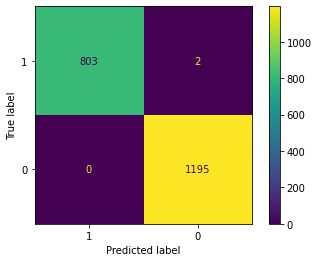

In [32]:
# Get accuracy of the model
# -------------------------
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))


# compute confusion matrix
# ------------------------
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# look at the value for both 'yes' and 'no' class, the model can predict 'no' better than 'yes' 
print(classification_report(y_test, y_pred))

### Validation by Measuring Accuracy using Cross Validation (k-fold cross validation)
1. use the KFold() to split the data
2. iterate through each of the kfold
3. calculate the Accuracy for each of the fold, and append to a list

In [40]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import statistics

# Create K-Fold splitter for 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create KNN model object
knn = KNeighborsClassifier(n_neighbors=3)

# List of accuracy for each fold
k_fold_accuracy = []

# Iterate through each fold and calculate the accuracy for each fold
for train_index, test_index in kf.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit/predict on train/validation set
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    
    # Calculate accuracy for the fold and append it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    k_fold_accuracy.append(round(accuracy, 4))
    
print('The Accuracy for each fold is:', k_fold_accuracy)
print('The average accuracy is:', statistics.mean(k_fold_accuracy))

The Accuracy for each fold is: [0.998, 0.997, 0.997, 0.999, 1.0, 0.997, 0.999, 0.999, 0.997, 0.999]
The average accuracy is: 0.9982


In [220]:
# save the model in a file to retrieve it later if necessary
# ----------------------------------------------------------
filename = 'platform_model_logreg.sav'
pickle.dump(logreg, open(filename, 'wb'))

### Retrieve the top 3 features of our model

In [221]:
# Recursive Feature Elimination (or RFE)
# --------------------------------------
# Works by recursively removing attributes and building a model 
# on those attributes that remain.
rfe = RFE(logreg, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False  True  True]
Feature Ranking: [1 2 1 1]


In [223]:
selected = fit.support_
# get the top-3 feature_names
feature_names = X.columns
print(feature_names.to_numpy()[selected])

['Time of Transaction' 'Cost of Purchase' 'Rating']


In [225]:
# To load the model from disk
loaded_model = pickle.load(open('platform_model_logreg.sav', 'rb'))
loaded_model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

### Trying out of CatBoost

Why? Because it automatically deal with categorical variables and does not require extensive data preprocessing

In [64]:
df.head()

,Type of Product,Date of Purchase,Cost of Purchase,Qty of Purchase,Customer ID,Seller Brand,Seller ID,Rating,Time Taken for Transaction (s),Month of Transaction,Time of Transaction,return
0,Baby and Toys,06/03/2021,664.03,6,46440,Fisher-Price,135,4,87.12,3,0.812500,1
1,Baby and Toys,09/12/2020,611.62,7,20726,Fisher-Price,209,1,3.00,12,0.843750,0
2,Fashion,07/06/2020,194.32,5,38188,Supre,701,2,97.24,6,0.958333,0
3,Fashion,20/08/2020,753.32,4,25439,Boohoo,840,2,67.30,8,0.843750,0
4,Fashion,30/11/2021,576.08,6,13253,Zalando,397,3,11.55,11,0.520833,0


In [77]:
type('Time of Transaction')

str

In [66]:
pip install catboost --target=/path/to/installation/directory


  Using cached catboost-1.1.1-cp38-none-macosx_10_6_universal2.whl (22.0 MB)
  Using cached matplotlib-3.7.1-cp38-cp38-macosx_10_12_x86_64.whl (7.4 MB)
  Using cached numpy-1.24.2-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  Using cached pandas-1.5.3-cp38-cp38-macosx_10_9_x86_64.whl (11.9 MB)
  Using cached scipy-1.10.1-cp38-cp38-macosx_10_9_x86_64.whl (35.0 MB)
  Using cached plotly-5.13.1-py2.py3-none-any.whl (15.2 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.2-py2.py3-none-any.whl (502 kB)
  Using cached fonttools-4.39.2-py3-none-any.whl (1.0 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
  Using cached contourpy-1.0.7-cp38-cp38-macosx_10_9_x86_64.whl (243 kB)
  Using cached Pillow-9.4.0-2-cp38-cp38-macosx_10_10_x86_64.whl (3.3 

In [85]:
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import f1_score


X = df[['Date of Purchase', 'Time of Transaction', 'Qty of Purchase', 'Cost of Purchase', 'Rating']]
y = df['return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate the model object
model = CatBoostClassifier(learning_rate=0.1, random_seed=5)

# Fit the model with the training data
model.fit(X_train, y_train, cat_features=([0]))  # set verbose=False if you find the logs too long

# Predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

# F1 Score on test dataset
f1_test = f1_score(y_test, y_predict)
print('\nF1 Score on test dataset : ', f1_test)

# save the model in a file to retrieve it later if necessary
# ----------------------------------------------------------
filename = 'platform_model_catboost.sav'
pickle.dump(model, open(filename, 'wb'))

0:	learn: 0.4168444	total: 6.96ms	remaining: 6.95s
1:	learn: 0.2667307	total: 15ms	remaining: 7.49s
2:	learn: 0.1680808	total: 18.6ms	remaining: 6.19s
3:	learn: 0.1099174	total: 24.7ms	remaining: 6.14s
4:	learn: 0.0764670	total: 31ms	remaining: 6.16s
5:	learn: 0.0520801	total: 35.9ms	remaining: 5.95s
6:	learn: 0.0359091	total: 39ms	remaining: 5.53s
7:	learn: 0.0273121	total: 43.4ms	remaining: 5.38s
8:	learn: 0.0207027	total: 47.2ms	remaining: 5.2s
9:	learn: 0.0171540	total: 51.5ms	remaining: 5.1s
10:	learn: 0.0144661	total: 55.4ms	remaining: 4.98s
11:	learn: 0.0123896	total: 59ms	remaining: 4.85s
12:	learn: 0.0111860	total: 62.1ms	remaining: 4.71s
13:	learn: 0.0101764	total: 65.6ms	remaining: 4.62s
14:	learn: 0.0093722	total: 69ms	remaining: 4.53s
15:	learn: 0.0087923	total: 72ms	remaining: 4.43s
16:	learn: 0.0080965	total: 74.8ms	remaining: 4.32s
17:	learn: 0.0072854	total: 78ms	remaining: 4.25s
18:	learn: 0.0066658	total: 81.9ms	remaining: 4.23s
19:	learn: 0.0066099	total: 84.8ms	rem

192:	learn: 0.0011786	total: 597ms	remaining: 2.5s
193:	learn: 0.0011786	total: 601ms	remaining: 2.5s
194:	learn: 0.0011786	total: 604ms	remaining: 2.49s
195:	learn: 0.0011785	total: 608ms	remaining: 2.49s
196:	learn: 0.0011785	total: 611ms	remaining: 2.49s
197:	learn: 0.0011785	total: 614ms	remaining: 2.49s
198:	learn: 0.0011785	total: 616ms	remaining: 2.48s
199:	learn: 0.0011785	total: 619ms	remaining: 2.48s
200:	learn: 0.0011784	total: 621ms	remaining: 2.47s
201:	learn: 0.0011784	total: 624ms	remaining: 2.47s
202:	learn: 0.0011784	total: 627ms	remaining: 2.46s
203:	learn: 0.0011784	total: 629ms	remaining: 2.45s
204:	learn: 0.0011784	total: 631ms	remaining: 2.45s
205:	learn: 0.0011783	total: 633ms	remaining: 2.44s
206:	learn: 0.0011783	total: 635ms	remaining: 2.43s
207:	learn: 0.0011783	total: 639ms	remaining: 2.43s
208:	learn: 0.0011783	total: 641ms	remaining: 2.43s
209:	learn: 0.0011783	total: 643ms	remaining: 2.42s
210:	learn: 0.0011783	total: 646ms	remaining: 2.41s
211:	learn: 0.

424:	learn: 0.0010887	total: 1.19s	remaining: 1.61s
425:	learn: 0.0010887	total: 1.19s	remaining: 1.6s
426:	learn: 0.0010886	total: 1.19s	remaining: 1.6s
427:	learn: 0.0010886	total: 1.2s	remaining: 1.6s
428:	learn: 0.0010885	total: 1.2s	remaining: 1.6s
429:	learn: 0.0010885	total: 1.2s	remaining: 1.59s
430:	learn: 0.0010885	total: 1.21s	remaining: 1.59s
431:	learn: 0.0010884	total: 1.21s	remaining: 1.59s
432:	learn: 0.0010884	total: 1.21s	remaining: 1.58s
433:	learn: 0.0010884	total: 1.21s	remaining: 1.58s
434:	learn: 0.0010884	total: 1.22s	remaining: 1.58s
435:	learn: 0.0010884	total: 1.22s	remaining: 1.58s
436:	learn: 0.0010884	total: 1.22s	remaining: 1.57s
437:	learn: 0.0010884	total: 1.22s	remaining: 1.57s
438:	learn: 0.0010883	total: 1.23s	remaining: 1.56s
439:	learn: 0.0010883	total: 1.23s	remaining: 1.56s
440:	learn: 0.0010883	total: 1.23s	remaining: 1.56s
441:	learn: 0.0010883	total: 1.23s	remaining: 1.55s
442:	learn: 0.0010882	total: 1.23s	remaining: 1.55s
443:	learn: 0.00108

660:	learn: 0.0010558	total: 1.78s	remaining: 912ms
661:	learn: 0.0010558	total: 1.78s	remaining: 909ms
662:	learn: 0.0010558	total: 1.78s	remaining: 906ms
663:	learn: 0.0010558	total: 1.78s	remaining: 903ms
664:	learn: 0.0010528	total: 1.79s	remaining: 901ms
665:	learn: 0.0010528	total: 1.79s	remaining: 899ms
666:	learn: 0.0010528	total: 1.8s	remaining: 900ms
667:	learn: 0.0010528	total: 1.8s	remaining: 897ms
668:	learn: 0.0010528	total: 1.81s	remaining: 894ms
669:	learn: 0.0010528	total: 1.81s	remaining: 891ms
670:	learn: 0.0010527	total: 1.81s	remaining: 888ms
671:	learn: 0.0010526	total: 1.81s	remaining: 885ms
672:	learn: 0.0010526	total: 1.82s	remaining: 882ms
673:	learn: 0.0010526	total: 1.82s	remaining: 879ms
674:	learn: 0.0010526	total: 1.82s	remaining: 877ms
675:	learn: 0.0010526	total: 1.82s	remaining: 874ms
676:	learn: 0.0010525	total: 1.82s	remaining: 871ms
677:	learn: 0.0010525	total: 1.83s	remaining: 869ms
678:	learn: 0.0010525	total: 1.83s	remaining: 866ms
679:	learn: 0.

882:	learn: 0.0010462	total: 2.36s	remaining: 313ms
883:	learn: 0.0010462	total: 2.37s	remaining: 311ms
884:	learn: 0.0010462	total: 2.37s	remaining: 308ms
885:	learn: 0.0010462	total: 2.37s	remaining: 305ms
886:	learn: 0.0010461	total: 2.38s	remaining: 303ms
887:	learn: 0.0010461	total: 2.38s	remaining: 300ms
888:	learn: 0.0010461	total: 2.38s	remaining: 297ms
889:	learn: 0.0010460	total: 2.38s	remaining: 295ms
890:	learn: 0.0010460	total: 2.39s	remaining: 292ms
891:	learn: 0.0010460	total: 2.39s	remaining: 289ms
892:	learn: 0.0010460	total: 2.4s	remaining: 288ms
893:	learn: 0.0010459	total: 2.4s	remaining: 285ms
894:	learn: 0.0010458	total: 2.41s	remaining: 282ms
895:	learn: 0.0010458	total: 2.41s	remaining: 280ms
896:	learn: 0.0010458	total: 2.41s	remaining: 277ms
897:	learn: 0.0010458	total: 2.41s	remaining: 274ms
898:	learn: 0.0010458	total: 2.42s	remaining: 271ms
899:	learn: 0.0010458	total: 2.42s	remaining: 269ms
900:	learn: 0.0010457	total: 2.42s	remaining: 266ms
901:	learn: 0.

## Trying out XGBoost

In [59]:
X

,Date of Purchase,Time of Transaction,Qty of Purchase,Cost of Purchase,Rating
0,06/03/2021,0.812500,6,664.03,4
1,09/12/2020,0.843750,7,611.62,1
2,07/06/2020,0.958333,5,194.32,2
3,20/08/2020,0.843750,4,753.32,2
4,30/11/2021,0.520833,6,576.08,3
...,...,...,...,...,...
9995,11/02/2021,0.927083,6,844.50,3
9996,20/01/2022,0.875000,2,811.50,1
9997,04/11/2020,0.802083,6,452.69,1
9998,12/08/2020,0.895833,10,235.06,2


In [60]:
X = df[['Date of Purchase', 'Time of Transaction', 'Qty of Purchase', 'Cost of Purchase', 'Rating']]
y = df['return']


# type('Date of Purchase')
type('Time of Transaction')

str

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import xgboost as xgb



X = df[['Date of Purchase', 'Time of Transaction', 'Qty of Purchase', 'Cost of Purchase', 'Rating']]
y = df['return']

X = preprocess_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)


# Instantiate the model object
model = xgb.XGBClassifier(learning_rate=0.1, random_state=5, eval_metric='error')

# Fit the model with the training data
model.fit(X_train, y_train)

# predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)


# F1 Score on test dataset
f1_test = f1_score(y_test, y_predict)
print('\nF1 Score on test dataset : ', f1_test)


# save the model in a file to retrieve it later if necessary
# ----------------------------------------------------------
filename = 'platform_model_xgboost.sav'
pickle.dump(model, open(filename, 'wb'))

<ipython-input-28-659a51132629>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-659a51132629>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-659a51132629>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-659a

---Successfully processed numeric column(s)
  Date of Purchase  Time of Transaction  Qty of Purchase  Cost of Purchase  \
0       06/03/2021             0.821053         0.555556          0.663952   
1       09/12/2020             0.852632         0.666667          0.611521   
2       07/06/2020             0.968421         0.444444          0.194050   
3       20/08/2020             0.852632         0.333333          0.753279   
4       30/11/2021             0.526316         0.555556          0.575966   

   Rating  
0    0.75  
1    0.00  
2    0.25  
3    0.25  
4    0.50  
---Successfully processed categorical column(s)
   Time of Transaction  Qty of Purchase  Cost of Purchase  Rating  \
0             0.821053         0.555556          0.663952    0.75   
1             0.852632         0.666667          0.611521    0.00   
2             0.968421         0.444444          0.194050    0.25   
3             0.852632         0.333333          0.753279    0.25   
4             0.526316

### Comparsion of Accuracy

1. LogisticRegression - 99.7% 
2. CatBoost - 99.9%
3. XGBoost (with categorical input: date) - Accuracy: 99.8%